# Определение факторов успешности продаж игр

<div style="border:solid grey 2px; padding: 30px">
    
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры.<br>
Целью исследования является выявление закономерности величины продаж определенной игры с целью формирования ассортимента на плановый период.<br>
Для анализа будут использоваться доступные из открытых источников  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).<br>
За плановый период в данном исследовании принят 2017 год.<br>

<div style="border:solid grey 2px; padding: 30px">
План работы:<br>
<p>1 Ознакомление с данными</p>
<p>2 Предобработка данных</p>
<p>3 Анализ данных по пр</p>
<p style="text-indent: 25px;">3.1 Краткий анализ отрасли</p>
<p style="text-indent: 25px;">3.2 Определение длительности жизненного цикла платформы</p>
<p style="text-indent: 25px;">3.3 Выбор перспективных платформ на плановый период</p>
<p style="text-indent: 25px;">3.4 Анализ продаж по выбранным платформам</p>
<p>4 Составление портретов пользователей</p>
<p>5 Проверка предложенных гипотез</p>
<p>6 Общий вывод</p>
    </div>

## 1 Загрузка данных и библиотек

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [46]:
#df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df = pd.read_csv('/datasets/games.csv')

In [47]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div style="border:solid grey 2px; padding: 30px">
У нас есть данные по 16 715 игр на различных платформах за период с 1980 по 2016 гг.<br>
В таблице указаны имеются следующие данные по играм:<br>
Name — название игры <br>
Platform — платформа <br>
Year_of_Release — год выпуска <br>
Genre — жанр игры <br>
NA_sales — продажи в Северной Америке (миллионы долларов) <br>
EU_sales — продажи в Европе (миллионы долларов) <br>
JP_sales — продажи в Японии (миллионы долларов) <br>
Other_sales — продажи в других странах (миллионы долларов) <br>
Critic_Score — оценка критиков (максимум 100) <br>
User_Score — оценка пользователей (максимум 10) <br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 2 Предобработка данных

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [49]:
df.drop(df.loc[df['Name'].isna()].index, inplace=True)
df.drop(df.loc[df['Year_of_Release'].isna()].index, inplace=True)

In [50]:
df['Year_of_Release'] = round(df['Year_of_Release'], 0).astype(int)

In [51]:
df.loc[df['User_Score'] == 'tbd'] = np.nan
df['User_Score'] = df['User_Score'].astype('float64')

In [52]:
df['Tot_sales'] = df['NA_sales'] + df['EU_sales'] + df['JP_sales'] + df['Other_sales']

<div style="border:solid grey 2px; padding: 30px">
    Удалили записи без имени и года - это основные данные, без которых с соответствующими записями нам делать нечего (плюс их немного). Пропуски в инх являются случайными. Данные по годам выпуска игр можно было бы восстановить по названиям игр, также, теоретически, можно было бы найти пропущенные названия, зная жанр, год, рейтинги и платформу.<br>
Year_of_Release перевели в int.<br>
Удалили стринги из User_Score.<br>
Рассчитали суммарные продажи.

## 3 Анализ данных

### Количество игр по годам

In [53]:
print('\033[1m' + 'Количество выпускаемых игр по годам')
a1 = df.drop_duplicates(subset=['Name']).groupby('Year_of_Release')['Name'].agg('count').reset_index()
a1.columns = ['Year_of_Release', 'Count']
a1

Количество выпускаемых игр по годам


,Year_of_Release,Count
0,1980.0,8
1,1981.0,43
2,1982.0,33
3,1983.0,16
4,1984.0,13
5,1985.0,13
6,1986.0,21
7,1987.0,15
8,1988.0,11
9,1989.0,14


In [54]:
print('\033[1m' + 'Количество выпускаемых мультиплатформных игр по годам')
a2 = df.groupby(['Year_of_Release', 'Name'])['Platform'].agg('count').reset_index().query('Platform > 1').groupby('Year_of_Release')['Platform'].agg('count').reset_index()
a2.columns = ['Year_of_Release', 'Count']
a2

Количество выпускаемых мультиплатформных игр по годам


,Year_of_Release,Count
0,1991.0,1
1,1992.0,2
2,1993.0,1
3,1994.0,4
4,1995.0,4
5,1996.0,5
6,1997.0,7
7,1998.0,15
8,1999.0,12
9,2000.0,16


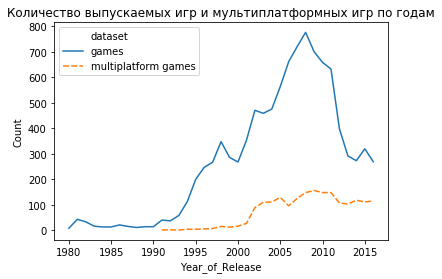

In [55]:
concatenated = pd.concat([a1.assign(dataset='games'), a2.assign(dataset='multiplatform games')])
sns.lineplot(x='Year_of_Release', y='Count', data=concatenated,
                hue='dataset', style='dataset')
plt.title('Количество выпускаемых игр и мультиплатформных игр по годам')
plt.show()


<div align="left", style="border:solid grey 2px; padding: 30px">
Бум геймдева был с 2002 по 2011 гг. Предположительно толчком к нему были<br> 1) рост и последующее падение общего темпа мировой диджетализации* <br> 2) выпуск 6-го и 7-го поколения консолей, которые оказали большее влияние, чем предыдущие и последующие, создав новые рынки, насыщение которых мы видим в 2002-2011 гг.<br>После этого количество выпускаемых игр стабилизирвоалось на величине 300 игр в год. При этом только около трети из них выпускают на более чем одной платформе. <br><br>
    * Рост мировых продаж ПК (млн шт. в год, CAGR) :<br>
    1996-2001 гг.: 57,2, 10,36%<br>
    2002-2011 гг.: 233, 10,68%<br>
    2012-2017 гг: -92, -4.92 %<br>
<a href="https://en.wikipedia.org/wiki/Personal_computer">Источник</a>


### Сколько живет платформа?

In [56]:
print('\033[1m' + 'Продажи по платформам и доля продаж каждой платформы в суммарных продажах')
sales_by_platform = df.groupby('Platform')['Tot_sales'].agg('sum').reset_index().sort_values('Tot_sales', ascending=False)

tot_sales = sales_by_platform['Tot_sales'].sum()
sales_by_platform['tot_sales_pct'] = round(sales_by_platform['Tot_sales'] / tot_sales *100 )
sales_by_platform['cum_pct'] = sales_by_platform['tot_sales_pct'].cumsum()



sales_by_platform[sales_by_platform['tot_sales_pct'] >= 2 ]

Продажи по платформам и доля продаж каждой платформы в суммарных продажах


,Platform,Tot_sales,tot_sales_pct,cum_pct
16,PS2,1171.19,14.0,14.0
28,X360,948.74,11.0,25.0
17,PS3,921.09,11.0,36.0
26,Wii,791.91,9.0,45.0
15,PS,714.26,9.0,54.0
4,DS,655.36,8.0,62.0
18,PS4,314.00,4.0,66.0
19,PSP,273.11,3.0,69.0
6,GBA,263.70,3.0,72.0
5,GB,254.43,3.0,75.0


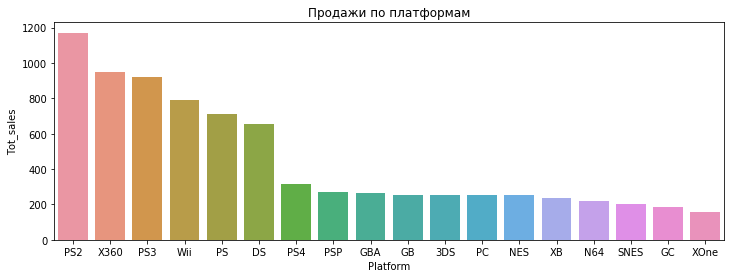

In [57]:
sns.barplot(data = sales_by_platform[sales_by_platform['tot_sales_pct'] >= 2 ]
            ,x = 'Platform'
            ,y = 'Tot_sales')
fig = plt.gcf()
plt.title('Продажи по платформам')
fig.set_size_inches(12, 4)

In [58]:
print('\033[1m' + 'Список платформ с наибольшими продажами')
top_platforms = sales_by_platform[sales_by_platform['tot_sales_pct'] >= 2 ]['Platform']
top_platforms

Список платформ с наибольшими продажами


16     PS2
28    X360
17     PS3
26     Wii
15      PS
4       DS
18     PS4
19     PSP
6      GBA
5       GB
2      3DS
13      PC
11     NES
29      XB
10     N64
23    SNES
7       GC
30    XOne
Name: Platform, dtype: object

In [59]:
print('\033[1m' + 'Продажи игр по годам по платформам с наибольшими продажами')
top_platforms_sales = pd.pivot_table(df.query('Platform in @top_platforms and Year_of_Release>1985'), values='Tot_sales', index=['Year_of_Release'],
                    columns=['Platform'], aggfunc=np.sum).reset_index()
top_platforms_sales

Продажи игр по годам по платформам с наибольшими продажами


Platform,Year_of_Release,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,X360,XB,XOne
0,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1988.0,NaN,NaN,1.43,NaN,NaN,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1989.0,NaN,NaN,64.97,NaN,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990.0,NaN,NaN,4.89,NaN,NaN,NaN,15.73,NaN,NaN,NaN,NaN,NaN,NaN,26.15,NaN,NaN,NaN,NaN
5,1991.0,NaN,NaN,5.57,NaN,NaN,NaN,6.11,NaN,NaN,NaN,NaN,NaN,NaN,16.22,NaN,NaN,NaN,NaN
6,1992.0,NaN,NaN,25.49,NaN,NaN,NaN,1.98,3.03,NaN,NaN,NaN,NaN,NaN,32.98,NaN,NaN,NaN,NaN
7,1993.0,NaN,NaN,NaN,NaN,NaN,NaN,3.61,NaN,NaN,NaN,NaN,NaN,NaN,40.02,NaN,NaN,NaN,NaN
8,1994.0,NaN,NaN,12.18,NaN,NaN,NaN,0.11,12.87,6.03,NaN,NaN,NaN,NaN,35.08,NaN,NaN,NaN,NaN
9,1995.0,NaN,NaN,3.60,NaN,NaN,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,32.20,NaN,NaN,NaN,NaN


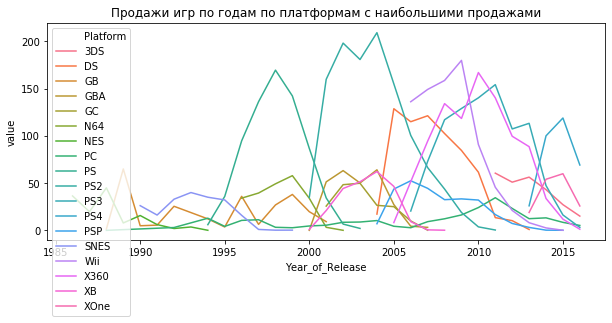

In [60]:
sns.lineplot(x='Year_of_Release', y='value', hue='Platform', 
             data=pd.melt(top_platforms_sales, ['Year_of_Release']))
fig = plt.gcf()
plt.title('Продажи игр по годам по платформам с наибольшими продажами')
fig.set_size_inches(10, 4)

Проведем расчет срока жизни: отфильтруем данные по продажам, исключив из срока жизни года с продажами менее $10 млн и платформы, чей срок жизни еще не закончился (PS4, XOne, PC). 

In [61]:
top_platforms_sales1 = top_platforms_sales.copy()
top_platforms_sales1[top_platforms_sales<10] = np.nan
top_platforms_sales1[top_platforms_sales1.columns.difference(['PC', 'XOne', 'PS4'])].count().mean()

8.5

In [62]:
actual_year = np.ceil(df['Year_of_Release'].max()- top_platforms_sales[top_platforms_sales.columns.difference(['PC', 'XOne', 'PS4'])].count().mean())
actual_year

2005.0

<div align="left", style="border:solid grey 2px; padding: 30px">
В среднем срок жизни платформы составляет 8,5 лет.

### Выбор платформ на 2017 год


На планируемый период (2017 г.) целесообразно рассматривать в качестве потенциальных платформ только те, по которым были продажи в планируемом периоде - 1 (2016 г.).

In [63]:
print('\033[1m' + 'Платформы, игры на которых продавались в 2016 г.')
sales_2016 = top_platforms_sales[top_platforms_sales.columns[top_platforms_sales[top_platforms_sales['Year_of_Release']==2016].notna().all()]]
sales_2016

Платформы, игры на которых продавались в 2016 г.


Platform,Year_of_Release,3DS,PC,PS3,PS4,X360,XOne
0,1986.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1987.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1988.0,NaN,0.03,NaN,NaN,NaN,NaN
3,1989.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1991.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1992.0,NaN,3.03,NaN,NaN,NaN,NaN
7,1993.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1994.0,NaN,12.87,NaN,NaN,NaN,NaN
9,1995.0,NaN,4.22,NaN,NaN,NaN,NaN


<div align="left", style="border:solid grey 2px; padding: 30px">
    На основании того, что:<br>
    1) продажи по платформе в 2016 году положительные;<br>
    2) время от старта продаж по платформе меньше, чем срок жизни платформы ;<br>
    3) тренд продаж не нисходящий<br>
    (PC исключение) <br>
    выбираем следующие платформы на 2017 год: XOne, PS4, PC.



In [64]:
platforms2017 = ['XOne', 'PS4', 'PC']
platforms2017

['XOne', 'PS4', 'PC']

<font color=green>Обоснование своих действий - очень важная часть проекта. 
    
---

### Анализ продаж по выбранным платформам

#### Сравниваем распределения

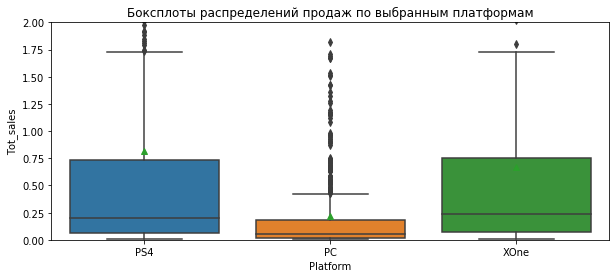

In [65]:
top_platforms = top_platforms_sales[top_platforms_sales.columns[top_platforms_sales[top_platforms_sales['Year_of_Release']==2016].notna().all()]].columns[:2]

sns.boxplot(x='Platform', y='Tot_sales', 
             data=df.query('Platform in @platforms2017 and Year_of_Release > @actual_year'), showmeans=True)
fig = plt.gcf()
plt.title('Боксплоты распределений продаж по выбранным платформам')
plt.ylim(0, 2)
fig.set_size_inches(10, 4)


In [66]:
df.query('Platform in @platforms2017 and Year_of_Release >@actual_year')['Platform'].value_counts()

PC      730
PS4     386
XOne    236
Name: Platform, dtype: int64

In [67]:
PC = df[df['Platform'] == 'PC'][['Name', 'Tot_sales']]
PC.columns = ['Name', 'PC_sales']

XOne = df[df['Platform'] == 'XOne'][['Name', 'Tot_sales']]
XOne.columns = ['Name', 'XOne_sales']

PS4 = df[df['Platform'] == 'PS4'][['Name', 'Tot_sales']]
PS4.columns = ['Name', 'PS4_sales']

dff = pd.merge(PC, XOne, how='inner', on=['Name']).merge(PS4, on='Name')



dff.mean()
#dff.count()


PC_sales      0.302981
XOne_sales    0.934038
PS4_sales     1.914519
dtype: float64

<div align="left", style="border:solid grey 2px; padding: 30px">
Игры на приставочных платформах продаются одинаково. Игры на ПК продаются заметно хуже, чем на приставочных, по всем показателям: средние, медианные, максимальные и минимальные продажи. При этом количество продаваемых игр на ПК больше, чем на ХОne и PS4 вместе взятых. <br>
Средние продажи каждой игры, которая выходила на всех трех платформах на РС в три раза меньше, чем на XOne и в 6 раз меньше, чем на PS4. <br>
На это влияет в том числе цена - при прочих равных игры на консолях дороже за счет необходимости оплаты разработчиками лицензионных платежей в пользу платформ.

<font color=green> Вполне реальная причина. Почему тогда сборы на PC меньше, чем на платформах? Платформы есть не у всех, в отличие от PC, а также цена игр может отпугнуть потенциальных покупателей. 
    
---

#### Влияние рейтингов пользователей и критиков

XOne
-0.06892505328279414
0.41215586820316974
PS4
-0.031957110204556424
0.4064685741971657
PC
-0.020555707172675495
0.28629994099149964


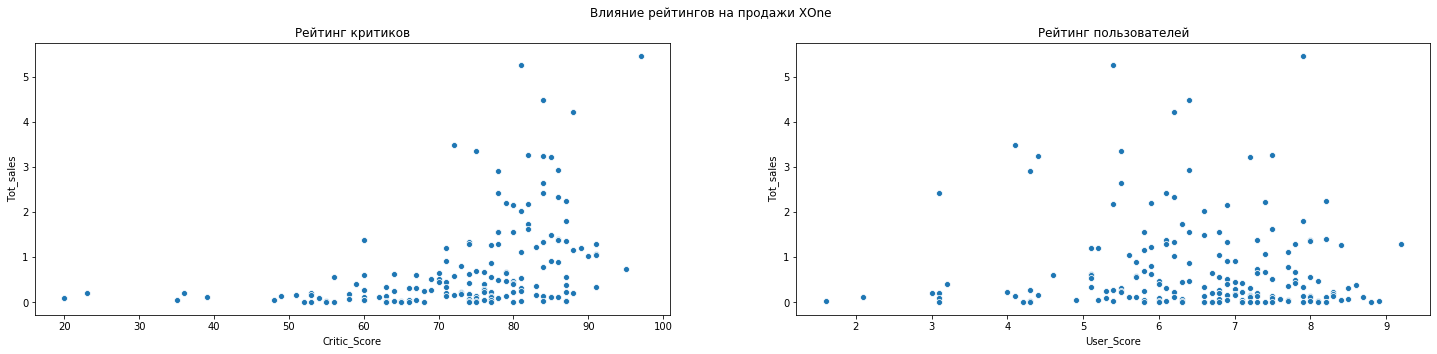

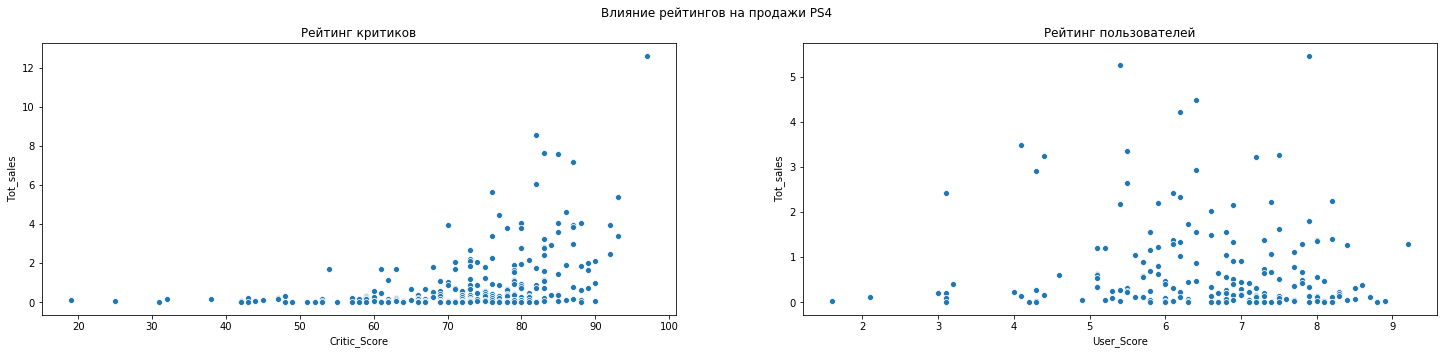

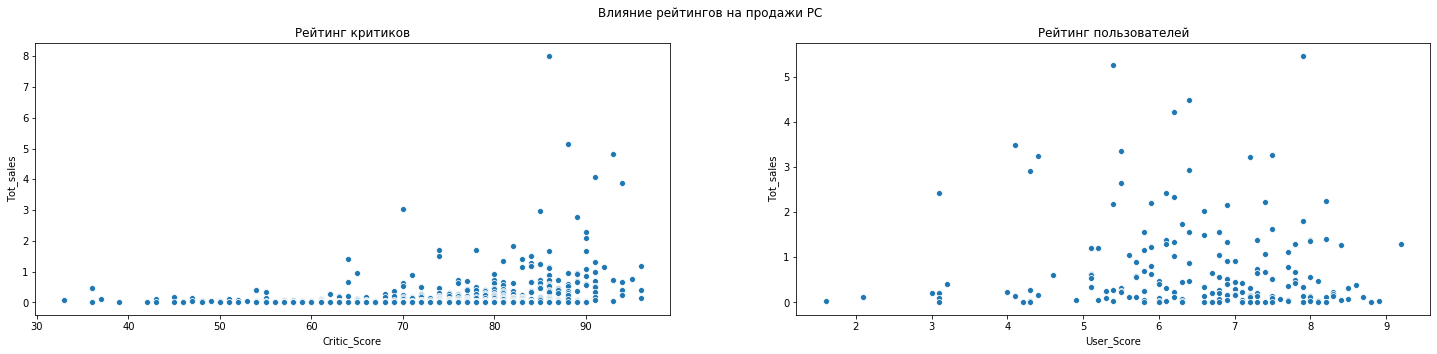

In [68]:
for platform in platforms2017:
    print(platform)
    f, axes = plt.subplots(1, 2, figsize=(25, 5), sharex=False)
    f.suptitle('Влияние рейтингов на продажи {}'.format(platform))
    axes[0].set_title("Рейтинг критиков")
    axes[1].set_title("Рейтинг пользователей")
    sns.scatterplot(data = df.query('Platform == @platform and Year_of_Release >@actual_year')
            ,x = 'Critic_Score'
            ,y = 'Tot_sales'
            ,ax=axes[0])
    sns.scatterplot(data = df.query('Platform == "XOne" and Year_of_Release >@actual_year')
            ,x = 'User_Score'
            ,y = 'Tot_sales'
            ,ax=axes[1])
    print(df.query('Platform == @platform and Year_of_Release >@actual_year')['User_Score'].corr(df['Tot_sales']))
    print(df.query('Platform == @platform and Year_of_Release >@actual_year')['Critic_Score'].corr(df['Tot_sales']))

<div align="left", style="border:solid grey 2px; padding: 30px">
    По диаграммам рассеивания видно, что продажи игр по выбранным платформам коррелируют с рейтингами критиков. Коэффициент корреляции составляет от 0,29 до 0,41.<br>
При этом корреляция продаж и рейтинга пользователей отсутствует.<br>
Наличие одной и отсутствие другой зависимости можно объяснить тем, что пользователи, которые собственно покупают игры, ориентируются на отзывы критиков, а не других пользователей.<br>
Ситуация одинакова для всех выбранных платформ.


#### Влияние жанра игры на продажи

In [69]:
a = df.query('Year_of_Release >2010').groupby('Genre')['Tot_sales'].agg(['sum', 'count', lambda x: x.sum()/ x.count()]).reset_index()
a.columns = ['genre', 'sum', 'count', 'sales_per_game']
a.sort_values('sales_per_game', ascending=False)

,genre,sum,count,sales_per_game
8,Shooter,402.27,316,1.273006
4,Platform,87.71,110,0.797364
10,Sports,229.89,340,0.676147
6,Racing,86.20,160,0.538750
7,Role-Playing,245.63,465,0.528237
0,Action,546.15,1188,0.459722
3,Misc,119.88,279,0.429677
2,Fighting,66.78,156,0.428077
9,Simulation,47.16,112,0.421071
5,Puzzle,8.36,43,0.194419


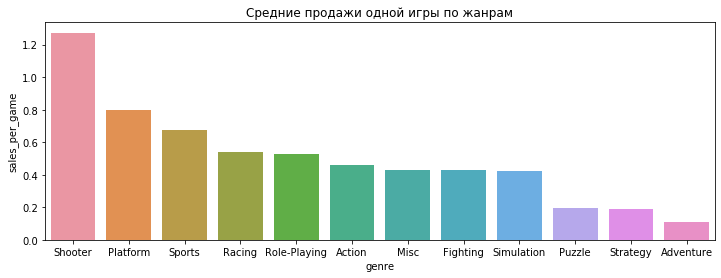

In [70]:
sns.barplot(data = a.sort_values('sales_per_game', ascending=False)
            ,x = 'genre'
            ,y = 'sales_per_game')
fig = plt.gcf()
plt.title('Средние продажи одной игры по жанрам')
fig.set_size_inches(12, 4)

,genre,sum,count,sales_per_game
0,Action,546.15,1188,0.459722
1,Adventure,43.24,388,0.111443
2,Fighting,66.78,156,0.428077
3,Misc,119.88,279,0.429677
4,Platform,87.71,110,0.797364
5,Puzzle,8.36,43,0.194419
6,Racing,86.20,160,0.538750
7,Role-Playing,245.63,465,0.528237
8,Shooter,402.27,316,1.273006
9,Simulation,47.16,112,0.421071


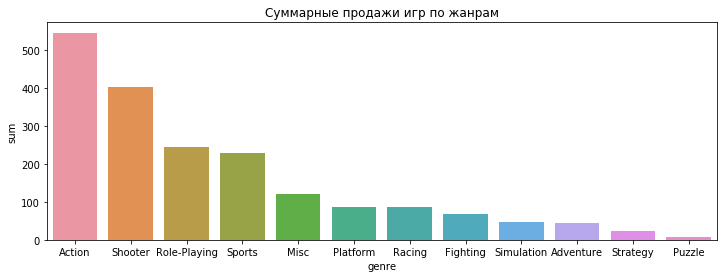

In [71]:
a.sort_values('sum', ascending=False)
sns.barplot(data = a.sort_values('sum', ascending=False)
            ,x = 'genre'
            ,y = 'sum')
fig = plt.gcf()
plt.title('Суммарные продажи игр по жанрам')
fig.set_size_inches(12, 4)
a

<div align="left", style="border:solid grey 2px; padding: 30px">
    Топ-3 жанров по суммарным продажам: экшн, шутер и РПГ.<br>
Топ-3 жанров по продажам на одну игру: шутер, платформер и спорт.<br>
Шутер - явный лидер для нашего маганзина.

На данный момент мы выяснили, что:<br>
в год выпускается примерно 300 новых игр, треть из них мультиплатформенные;<br>
лидерами по настоящий момент среди платформ по продажам были PS и Xbox;<br>
средний срок жизни платформы составляет 8,5 лет;<br>
перспективными платформами на 2017 год будут являться продолжения PS и Xbox в лице PS4 и XOne, также актуальность сохраняет PC;<br>
на PC выходит больше игр, чем на выбранные консоли, но продаются они значительно дешевле, что приводит к значительно меньшим продажам;<br>
больше всего продается игр жанров экшн, шутер, РПГ, но стоит иметь в виду, что себестоимость данных игр выше, чем других жанров.<br>

### 4 Портрет пользователя каждого региона

#### NA

In [90]:
reg_sales_NA = df.query('NA_sales > 0 and Year_of_Release > @actual_year').groupby('Platform')['NA_sales'].agg('sum').reset_index().sort_values('NA_sales', ascending= False).head(5)
tot_sales_NA = df.query('NA_sales > 0 and Year_of_Release > @actual_year')['NA_sales'].sum()
reg_sales_NA['sales_pct'] = round(reg_sales_NA['NA_sales'] / tot_sales_NA * 100 )
reg_sales_NA

,Platform,NA_sales,sales_pct
12,X360,578.94,27.0
10,Wii,412.77,19.0
6,PS3,383.80,18.0
1,DS,224.11,10.0
7,PS4,108.62,5.0


In [101]:
genre_NA = df.query('NA_sales > 0 and Year_of_Release > @actual_year').groupby('Genre')['NA_sales'].agg('sum').reset_index().sort_values('NA_sales', ascending= False).head(5)
genre_NA

,Genre,NA_sales
0,Action,499.93
8,Shooter,370.14
10,Sports,356.99
3,Misc,232.00
7,Role-Playing,197.55


In [113]:
rating_NA = df.query('NA_sales > 0 and Year_of_Release > @actual_year').groupby('Rating')['NA_sales'].agg(['sum', 'count', lambda x: x.sum()/ x.count()]).reset_index().sort_values('sum', ascending=False)
rating_NA

,Rating,sum,count,<lambda_0>
0,E,638.75,1194,0.534966
2,M,573.11,968,0.592056
3,T,400.03,1336,0.299424
1,E10+,281.08,873,0.321970


#### EU

In [99]:
reg_sales_EU = df.query('EU_sales > 0 and Year_of_Release > @actual_year').groupby('Platform')['EU_sales'].agg('sum').reset_index().sort_values('EU_sales', ascending= False).head(5)
tot_sales_EU = df.query('EU_sales > 0 and Year_of_Release > @actual_year')['EU_sales'].sum()
reg_sales_EU['sales_pct'] = round(reg_sales_EU['EU_sales'] / tot_sales_EU * 100 )
reg_sales_EU


,Platform,EU_sales,sales_pct
6,PS3,324.88,23.0
12,X360,266.31,19.0
10,Wii,241.29,17.0
7,PS4,141.09,10.0
1,DS,112.13,8.0


In [103]:
genre_EU = df.query('EU_sales > 0 and Year_of_Release > @actual_year').groupby('Genre')['EU_sales'].agg('sum').reset_index().sort_values('EU_sales', ascending= False).head(5)
genre_EU

,Genre,EU_sales
0,Action,340.39
10,Sports,240.44
8,Shooter,238.50
3,Misc,131.27
6,Racing,111.02


In [115]:
rating_EU = df.query('EU_sales > 0 and Year_of_Release > @actual_year').groupby('Rating')['EU_sales'].agg(['sum', 'count', lambda x: x.sum()/ x.count()]).reset_index().sort_values('sum', ascending=False)
rating_EU

,Rating,sum,count,<lambda_0>
0,E,413.39,992,0.416724
2,M,398.35,1003,0.397159
4,T,226.66,1248,0.181619
1,E10+,161.98,759,0.213412
3,RP,0.03,1,0.030000


#### JP

In [98]:
reg_sales_JP = df.query('JP_sales > 0 and Year_of_Release > @actual_year').groupby('Platform')['JP_sales'].agg('sum').reset_index().sort_values('JP_sales', ascending= False).head(5)
tot_sales_JP = df.query('JP_sales > 0 and Year_of_Release > @actual_year')['JP_sales'].sum()
reg_sales_JP['sales_pct'] = round(reg_sales_JP['JP_sales'] / tot_sales_JP * 100 )
reg_sales_JP


,Platform,JP_sales,sales_pct
2,DS,138.03,25.0
0,3DS,100.39,18.0
6,PS3,79.04,14.0
8,PSP,70.31,13.0
10,Wii,67.85,12.0


In [104]:
genre_JP = df.query('JP_sales > 0 and Year_of_Release > @actual_year').groupby('Genre')['JP_sales'].agg('sum').reset_index().sort_values('JP_sales', ascending= False).head(5)
genre_JP

,Genre,JP_sales
7,Role-Playing,170.04
0,Action,100.82
3,Misc,63.82
10,Sports,48.32
4,Platform,35.20


In [114]:
rating_JP = df.query('JP_sales > 0 and Year_of_Release > @actual_year').groupby('Rating')['JP_sales'].agg(['sum', 'count', lambda x: x.sum()/ x.count()]).reset_index().sort_values('sum', ascending=False)
rating_JP

,Rating,sum,count,<lambda_0>
0,E,117.67,342,0.344064
3,T,82.56,622,0.132733
2,M,43.78,475,0.092168
1,E10+,35.49,203,0.174828


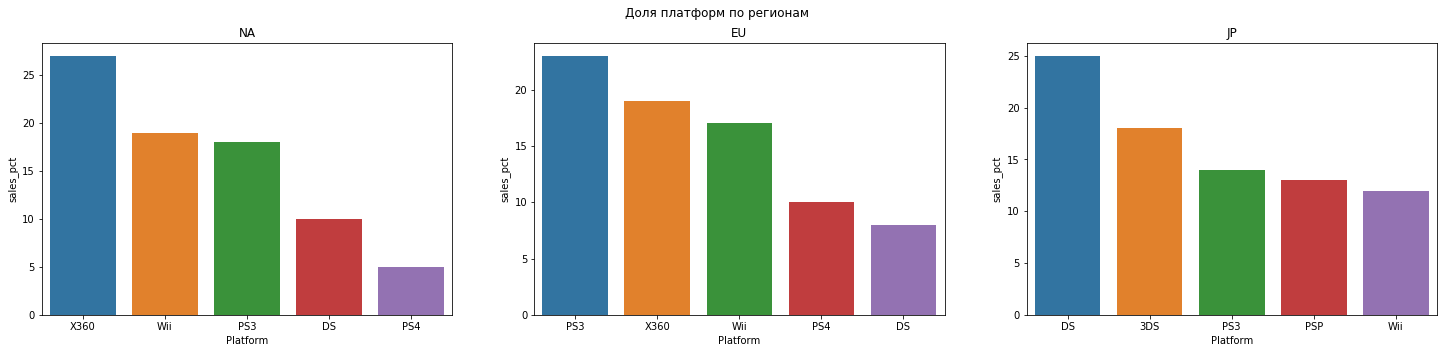

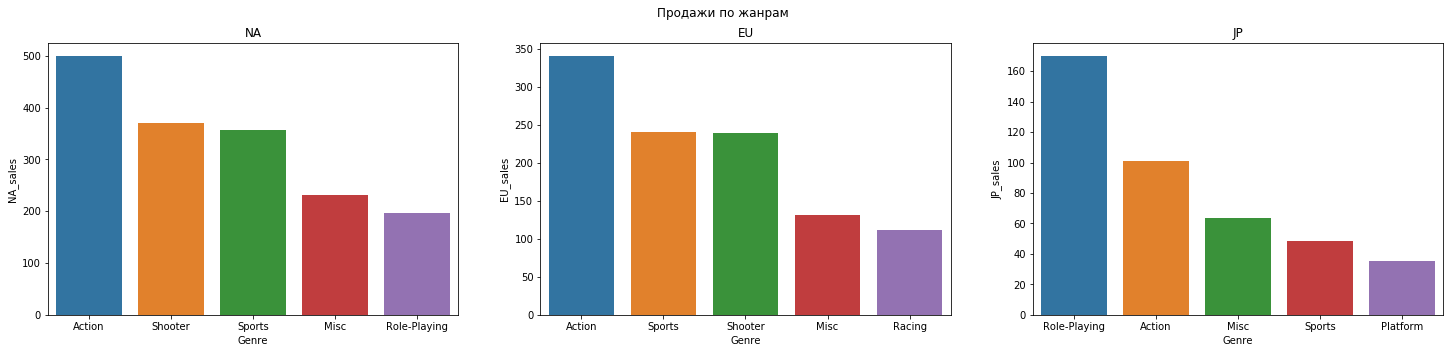

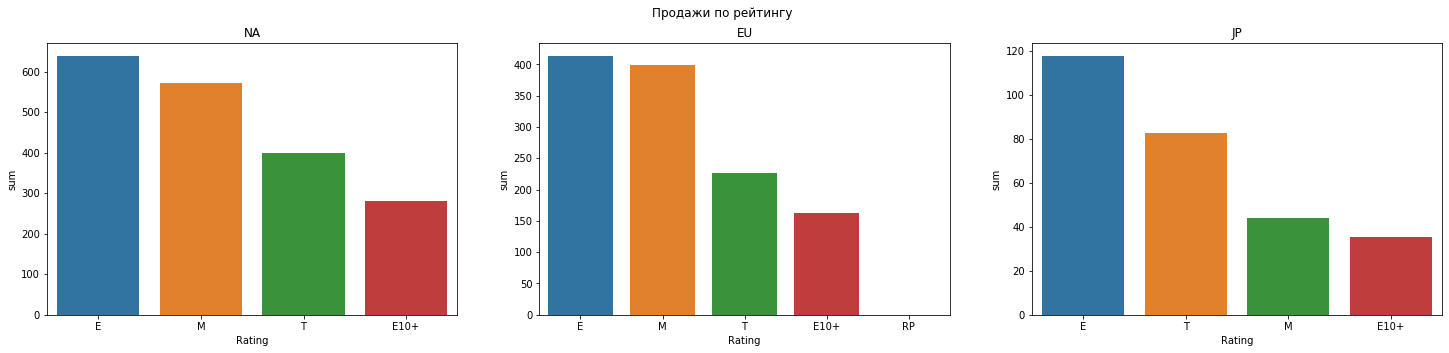

In [116]:
f, axes = plt.subplots(1, 3, figsize=(25, 5), sharex=False)
f.suptitle('Доля платформ по регионам')
axes[0].set_title("NA")
axes[1].set_title("EU")
axes[2].set_title("JP")
sns.barplot(data = reg_sales_NA
            ,x = 'Platform'
            ,y = 'sales_pct'
            ,ax=axes[0])
sns.barplot(data = reg_sales_EU
            ,x = 'Platform'
            ,y = 'sales_pct'
            ,ax=axes[1])
sns.barplot(data = reg_sales_JP
            ,x = 'Platform'
            ,y = 'sales_pct'
            ,ax=axes[2])

f, axes = plt.subplots(1, 3, figsize=(25, 5), sharex=False)
f.suptitle('Продажи по жанрам')
axes[0].set_title("NA")
axes[1].set_title("EU")
axes[2].set_title("JP")
sns.barplot(data = genre_NA
            ,x = 'Genre'
            ,y = 'NA_sales'
            ,ax=axes[0])
sns.barplot(data = genre_EU
            ,x = 'Genre'
            ,y = 'EU_sales'
            ,ax=axes[1])
sns.barplot(data = genre_JP
            ,x = 'Genre'
            ,y = 'JP_sales'
            ,ax=axes[2])

f, axes = plt.subplots(1, 3, figsize=(25, 5), sharex=False)
f.suptitle('Продажи по рейтингу')
axes[0].set_title("NA")
axes[1].set_title("EU")
axes[2].set_title("JP")
sns.barplot(data = rating_NA
            ,x = 'Rating'
            ,y = 'sum'
            ,ax=axes[0])
sns.barplot(data = rating_EU
            ,x = 'Rating'
            ,y = 'sum'
            ,ax=axes[1])
sns.barplot(data = rating_JP
            ,x = 'Rating'
            ,y = 'sum'
            ,ax=axes[2])

<div align="left", style="border:solid grey 2px; padding: 30px">
Профили пользователей регионов NA и EU почти аналогичны.<br>Топ платформ: PS3, PS4, X360, но в NA, в отличие от EU,  XOne уже успел вытеснить PC.<br>
Топ жанров также одинаков за исключением пятой позиции (прочее в NA против рейсинга в EU).<br>
По рейтингу полностью аналогичные топы: больше всех продаются игры для взрослых, после них - игры для всех.<br>
<br>
Азиаты особенные, профиль пользовтеля региона JP отличается.<br>
Наибольшую долю в платформах занимает Nintendo. Также там любят другие портативные консоли PSV и PSP. <br>
Огромную долю продаж занимают игры RPG, также, в отличие от европеоидов, присутствуют файтинги.<br>
Игры для взрослых имеют наименьшие продажи.

### 5 Проверка гипотез

In [123]:
df.query('Platform=="PC" and Year_of_Release>@actual_year')['User_Score'].mean()

6.830081300813008

In [124]:
df.query('Platform=="XOne" and Year_of_Release>@actual_year')['User_Score'].mean()

6.521428571428572

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

По общим правилам формулировки статистических гипотез формулируем


нулеую гипотезу:
> cредние пользовательские рейтинги платформ Xbox One и PC равны

и альтернативную: 
> cредние пользовательские рейтинги платформ Xbox One и PC не равны.

Для проверки равенства средних значений в двух выборках, имеющих нормальное распределение используется t-критерий Стьюдента. Наши сравниваемые выборки имеют распределение похожее на нормальное, поэтому используем t-критерий.


In [125]:
alpha = .05 
results = st.ttest_ind(
    df.dropna().query('Platform=="PC" and Year_of_Release>@actual_year')["User_Score"], 
    df.dropna().query('Platform=="XOne" and Year_of_Release>@actual_year')["User_Score"]) 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.01617899869488552
Отвергаем нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action и Sports разные.

По общим правилам формулировки статистических гипотез формулируем


нулеую гипотезу:
> cредние пользовательские рейтинги жанров Action и Sports равны.

и альтернативную: 
> cредние пользовательские рейтинги жанров Action и Sports не равны.

Для проверки равенства средних значений в двух выборках, имеющих нормальное распределение используется t-критерий Стьюдента. Наши сравниваемые выборки имеют распределение похожее на нормальное, поэтому используем t-критерий.


In [126]:
df.query('Genre == "Action" and Year_of_Release>@actual_year')['User_Score'].mean()

6.878625377643504

In [127]:
df.query('Genre == "Sports" and Year_of_Release>@actual_year')['User_Score'].mean()

6.416420118343195

In [129]:
alpha = .05 
results = st.ttest_ind(
    df.dropna().query('Genre == "Action" and Year_of_Release>@actual_year')['User_Score'], 
    df.dropna().query('Genre == "Sports" and Year_of_Release>@actual_year')['User_Score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7959786214567501
Не получилось отвергнуть нулевую гипотезу


<div align="left", style="border:solid grey 2px; padding: 30px">
    По результатам проверки гипотез первая гипотеза не была отвегнута (она же была нулевой), вторая гипотеза была отвергнута (нулевая гипотеза была не отвергнута).

### Общий вывод

<div align="left", style="border:solid grey 2px; padding: 30px">
Целью исследования является выявление закономерности величины продаж определенной игры с целью формирования ассортимента на плановый период для магазина "Стримчик".<br>
Для анализа использовались доступные из открытых источников  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).<br>
За плановый период в данном исследовании принят 2017 год.<br>

Данные были предобработаны: удалены записи с отсутствующими названиями игр и годами их выхода.<br>

Выяснили, что в год выпускается около 300 игр, примерно 100 из них выпускают на несколько платформ.<br>

В среднем срок жизни платформы составляет 5-10 лет. <br>
Как потенциально прибыльниые платформы на 2017 год были выбраны те, по которым были продажи в 2016 году, и было видно, что динамика продаж по ним будет сохранятся : XOne, PS4, PC.<br>
Распределение продаж игр на PS4 и XOne достаточно похожи. Среднее значение составляет около 750 у.е., медианное - 200 у.е. Показатели по PC ниже: среднее -  250 у.е., медианное - 100 у.е. <br>
Продажи игр по выбранным платформам коррелируют с рейтингами критиков. Коэффициент корреляции составляет от 0,26 до 0,41. При этом коррекляция продаж и рейтинга пользователей отсутствует.<br>
Топ-3 жанров по суммарным продажам: экшн, шутер и РПГ.<br>
Топ-3 жанров по продажам на одну игру: шутер, платформер и спорт.<br>

Профили пользователей регионов NA и EU почти аналогичны.<br>Топ платформ: PS3, PS4, X360. Топ жанров также одинаков: экшн, шутер, спорт, РПГ. Больше всех продаются игры для врозслых, после них - игры для всех.<br>
Профиль пользовтеля региона JP отличается.<br>
Наибольшую долю в платформах занимает Nintendo. Также там любят другие портативные консоли PSV и PSP. <br>
Огромную долю продаж занимают игры RPG, также, в отличие от EU, NA, в топе жанров присутствуют файтинги.<br>
Игры для взрослых имеют наименьшие продажи.
<br>
По результатам проверки гипотеза гипотезы о том, что 
средние пользовательские рейтинги платформ Xbox One и PC одинаковые не была отвергнута, гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные была отвергунта.